# Hilber matrix

In [1]:
n  = 3;
x₀ = ones(n,1)

3×1 Array{Float64,2}:
 1.0
 1.0
 1.0

In [2]:
using MatrixDepot
Hn = matrixdepot("hilb", n)

include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


3×3 Array{Float64,2}:
 1.0       0.5       0.333333
 0.5       0.333333  0.25
 0.333333  0.25      0.2

In [3]:
using LinearAlgebra
cn = cond(Hn)

524.0567775860644

In [4]:
b = Hn * x₀

3×1 Array{Float64,2}:
 1.8333333333333333
 1.0833333333333333
 0.7833333333333332

In [5]:
xn = Hn \ b

3×1 Array{Float64,2}:
 0.9999999999999986
 1.0000000000000095
 0.99999999999999

In [6]:
rn= norm(x₀-xn)

1.389554002205336e-14

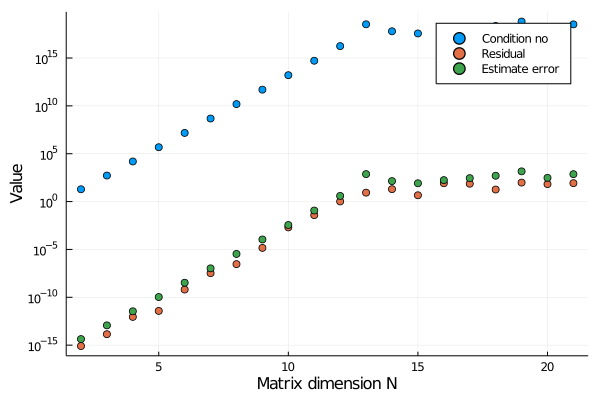

In [7]:
using Plots

range = 2:21             # range of computational search
cn = zeros(size(range))  # initialize rn results
rn = zeros(size(range))
er = zeros(size(range))
for n in 1:size(range,1)
    Hn = matrixdepot("hilb", range[n])
    cn[n] = cond(Hn);
    x₀=ones(range[n],1); b=Hn*x₀; xn=Hn\b;
    rn[n] = norm(x₀-xn);
    er[n] = cn[n]*eps(1.0);
end
plot(range, cn, yaxis=:log, seriestype=:scatter, label="Condition no"
    , xlabel="Matrix dimension N", ylabel="Value")
plot!(range, rn, seriestype=:scatter, label="Residual")
plot!(range, er, seriestype=:scatter, label="Estimate error")

# Questions

How many orders of magnitude separate the value of the residual and the value of the condition
number? Why is this the case?

Why do the condition number and the residual seem to saturate for n≥13 ? Hint: Matlab’s
cond() actually computes the inverse of the condition number, 1/κ . What effect might
round-off error have on 1/κ ?

# Answers

Condition number is essentially a division of two integer values. There is a gap between residual and condition number because of the denominator in the condition number. 

The residual saturates due to the numerical limit of integer numbers. They should fit into 15 bits, and this saturation level is maximum possible integer value of $k$.

Why residuals are smaller than error estimate? By definition $A e = r$, and all elements of $A$ matrix are small. Therefore $r$ should be much smaller than $e$. Comparison between $e$ are $r$ is dependent on the size of $A$ matrix. The larger it is the smaller $r$ will be in comparison with $e$.

## Adjourn

In [8]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/February/11 13:35"